In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
# load data
city_data = []
with open('/home/existentialrobotics/Documents/tianyu/Astar/data/CityData.csv') as f:
	reader = csv.reader(f)
	next(reader, None) # skip header
	for row in reader:
		items = [np.int(i) for i in row]
		city_data.append(items)
city_data = np.array(city_data)

insitu_data = []
with open('/home/existentialrobotics/Documents/tianyu/Astar/data/In_situMeasurementforTraining_201712.csv') as f:
	reader = csv.reader(f)
	next(reader, None) # skip header
	for row in reader:
		items = [np.float(i) for i in row]
		insitu_data.append(items)
insitu_data = np.array(insitu_data)
print(insitu_data.shape)

(20763720, 5)


(4152744, 5)


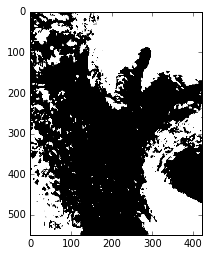

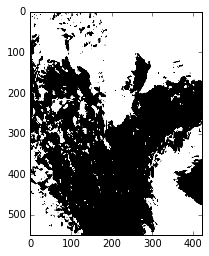

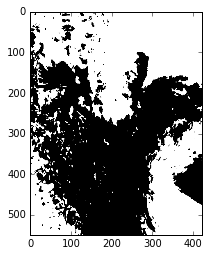

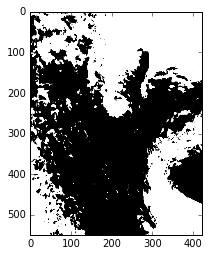

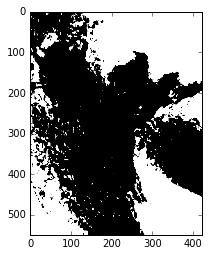

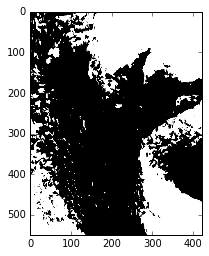

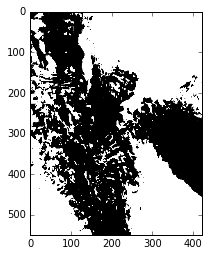

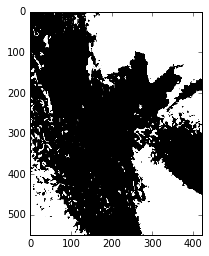

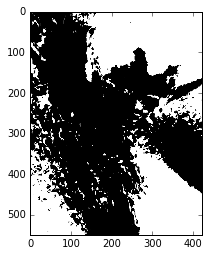

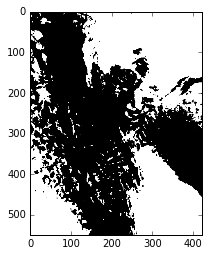

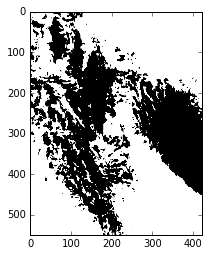

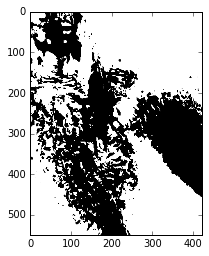

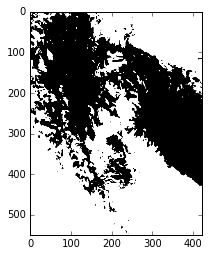

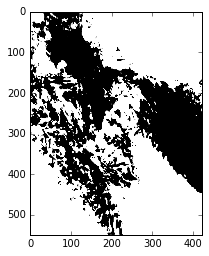

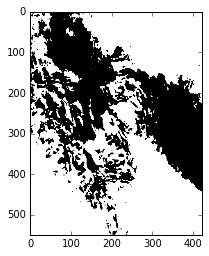

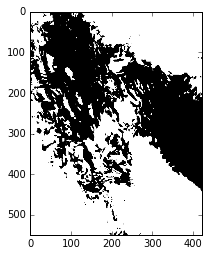

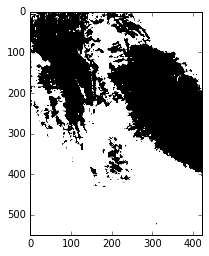

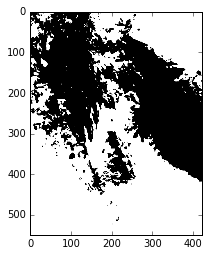

In [15]:
# build weather map for day 1
x_axis = insitu_data[:,0]
y_axis = insitu_data[:,1]

d1 = insitu_data[insitu_data[:,2]==3]
print(d1.shape)
d1 = d1.reshape((18,230708,5)) # (hours, # of data per hour, # of headers)

weather_map = np.zeros((18,np.int(np.amax(x_axis))+1,np.int(np.amax(y_axis))+1), dtype=np.uint8)

for t in range(18):
    hour_map = d1[t,:,:] # data of an hour
    wind = hour_map[hour_map[:,4]>=15] # data where wind >= 15
    weather_map[t, wind[:,0].astype(int), wind[:,1].astype(int)] = 1 # draw map where wind >= 15
    #plt.imshow(weather_map[t], cmap='Greys')
    #plt.show()
    